In [72]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [73]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [74]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [75]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [76]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [77]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [96]:
applySwap = True
circ = makeCirc(4, '0000')
circ.h(0)
circ.h(2)
circ.cx(0, 1)
circ.cx(2, 3)
circ.barrier()
if (applySwap == True):
    circ.cx(2, 1)
    circ.cx(1, 2)
    circ.cx(0, 3)
    circ.barrier()
circ.measure(range(4), range(4))

0000


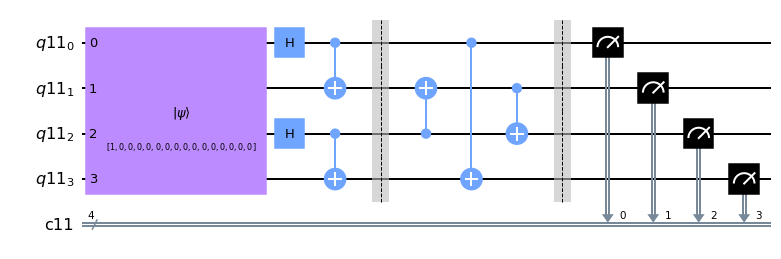

In [97]:
circ.draw('mpl', fold=-1)

In [98]:
getHisto(1024, circ)

{'1010': 239, '0101': 253, '0000': 278, '1111': 254}